In [0]:
from fastai import *


Requirement already up-to-date: fastprogress in /usr/local/lib/python3.6/dist-packages (0.2.1)


In [0]:
from fastai.vision import *


In [0]:
import numpy as np

In [3]:
!pip install google_images_download

     |████████████████████████████████| 911kB 10.1MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=a70ad63a87f77062c6090f8226b46b3fa2210690c419ea0ed38b19563907b898
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [5]:
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"Rabbit,Racoon","limit":60,"print_urls":False}
paths = response.download(arguments)
print(paths)


Item no.: 1 --> Item name = Rabbit
Evaluating...
Starting Download...
Completed Image ====> 1.Oryctolagus_cuniculus_Rcdo.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 2.bunnies_web-1500x1000.jpg
Completed Image ====> 3.https%3A%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190701154053-rabbit-stock.jpg
Completed Image ====> 4.rabbits-235417.jpg
Completed Image ====> 5.65xDQxBV26qkgupGHbJSSZ-320-80.jpg
Completed Image ====> 6.us-movie-rabbits-meaning.jpg
Completed Image ====> 7.11434353_web1_180418-ISJ-Rabbits_2.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 8.rabbit1.jpg
Completed Image ====> 9.rabbit-breeds-american-white-1553635287.jpg
Completed Image ====> 10.gettyimages-10141026_slide-67be9fc1bca330b26debade87690b5e84286614d-s800-c85.jpg
Completed Image ====> 11.lnc-rabbit-vet-care.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 12.Image-6k-Other-pets-section_white-and-brown-rabbit.jpg
Completed Image ====> 13.N

In [0]:
!zip -r /content/rabbit_racoon.zip /content/downloads/

In [0]:
from google.colab import files
files.download("/content/rabbit_racoon.zip.zip")

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
tfms = get_transforms(do_flip=False)
path = '/content/drive/My Drive/fastai/IC1'
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=100)

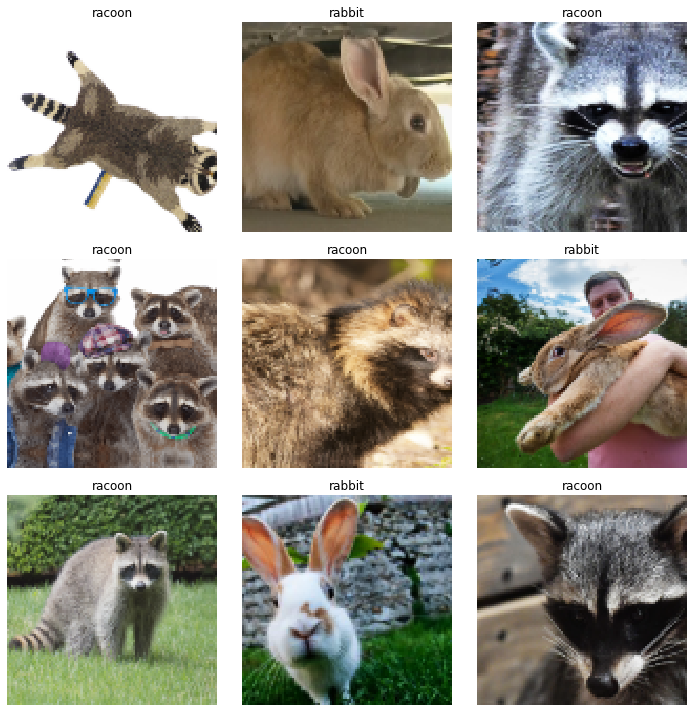

In [8]:
data.show_batch(rows=3, figsize=(10,10))


In [9]:
my_trained_mod = create_cnn(data, models.resnet34, metrics=error_rate)
my_trained_mod.fit_one_cycle(6)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 174MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.191662,2.580305,0.500000,00:16
1,1.215250,0.117171,0.050000,00:05
2,0.928336,0.234248,0.050000,00:04
3,0.758329,0.374650,0.050000,00:04
4,0.619232,0.429932,0.050000,00:04
5,0.529269,0.412502,0.050000,00:04


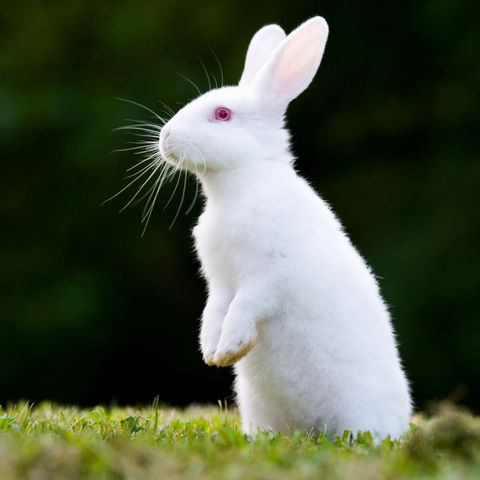

In [11]:
filename = '/content/drive/My Drive/fastai/IC1/custom/rabbit-breeds-american-white-1553635287.jpg'
img = open_image(filename)
img

In [13]:
pred = my_trained_mod.predict(img)
print(pred)


(Category rabbit, tensor(0), tensor([1.0000e+00, 4.9017e-11]))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


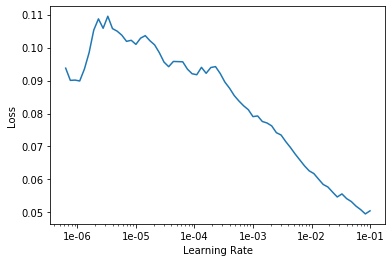

In [14]:
my_trained_mod.lr_find()
my_trained_mod.recorder.plot()

In [15]:
my_trained_mod.fit_one_cycle(3, max_lr=slice(1e-6,1e-1))


epoch,train_loss,valid_loss,error_rate,time
0,0.078920,0.806220,0.150000,00:04
1,0.163879,1.773065,0.050000,00:04
2,0.109224,1.063917,0.050000,00:04


In [17]:
pred = my_trained_mod.predict (img)
print (pred)

(Category rabbit, tensor(0), tensor([1., 0.]))
